# 뉴스 요약봇 만들기

## 1. 들어가며

- 긴 문장을 짧게 요약해 주는 텍스트 요약기를 만들어볼 예정
- 텍스트 요약은 끊임없이 늘어나는 정보를 쉽고 빠르게 소화하기 위해서 굉장히 중요한 기술
- 구글에서 검색되는 페이지만 해도 600억 개의 페이지 정도가 있다고 함
- 검색되지 않은 페이지들을 합치면, 그 수는 훨씬 클 것
- 게다가 인터넷은 계속해서 커지고 있으니, 사람이 이 모든 페이지를 다 소화하기는 무리일 것
- 여기에서 텍스트 요약(Text Summarization) 기술이 나타나 우리가 이 큰 정보들을 소화할 수 있도록 도와주는 것

### 학습 목표
- Extractive/Abstractive summarization 이해하기
- 단어장 크기를 줄이는 다양한 text normalization 적용해보기
- seq2seq의 성능을 Up시키는 Attention Mechanism 적용하기

## 2. 텍스트 요약(Text Summarization)이란?

![image1.png](./images/image1.png)
- 텍스트 요약(Text Summarization)이란 위 그림과 같이 긴 길이의 문서(Document) 원문을 핵심 주제만으로 구성된 짧은 요약(Summary) 문장들로 변환하는 것 말함
- 예를 들어 상대적으로 큰 텍스트인 뉴스 기사로 작은 텍스트인 뉴스 제목을 만들어내는 것이 텍스트 요약의 대표적인 예
- 이때 중요한 것은 요약 전후에 정보 손실 발생이 최소화되어야 한다는 점
- 이것은 정보를 압축하는 과정과 같음
- 비록 텍스트의 길이가 크게 줄어들었지만, 요약문은 문서 원문이 담고 있는 정보를 최대한 보존하고 있어야 함
- 이것은 원문의 길이가 길수록 만만치 않은 어려운 작업이 될 것
- 사람이 이 작업을 수행한다 하더라도 긴 문장을 정확하게 읽고 이해한 후, 그 의미를 손상하지 않는 짧은 다른 표현으로 원문을 번역해 내야 하는 것
- 그렇게 요약 문장을 만들어 내려면 어떤 방법을 사용하면 좋을까?
    - 여기서 텍스트 요약은 크게 추출적 요약(Extractive Summarization)과 추상적 요약(Abstractive Summarization)의 2가지 접근으로 나누어볼수 있음

### 추출적 요약(Extractive Summarization)

- 추출적 요약은 단어 그대로 원문에서 **문장들을 추출**해서 요약하는 방식
- 가령, 10개의 문장으로 구성된 텍스트가 있다면, 그중 핵심적인 문장 3개를 꺼내와서 3개의 문장으로 구성된 요약문을 만드는 식
- 그런데 꺼내온 3개의 문장이 원문에서 중요한 문장일 수도 있어도, 3개의 문장의 연결이 자연스럽지 않을 수는 있음
- 결과로 나온 문장들의 호응이 자연스럽지 않을 수 있음
- 딥러닝보다는 주로 전통적인 머신 러닝 방식에 속하는 텍스트 랭크(TextRank)와 같은 알고리즘을 사용해서 이 방법을 사용
- 이런 방식을 이미 서비스에 도입해서 활용하과 있는 사례가 있음
- 가장 대표적인 것이 네이버 뉴스 서비스에 있는 '요약봇' 기능
- [네이버 뉴스](https://news.naver.com/)에에 접속해서 아무 뉴스 기사나 클릭
- 제목 우하단의 '요약봇' 버튼 다시 클릭해보기
- 기사 원문을 단 3줄로 요약한 글 볼 수 있음
- 가끔은 3 문장간 연결이 조금 매끄럽지 않게 느껴질 때도 있지만 꽤 그럴듯한 요약문으로 보임
- 위에서 소개한 TextRank 알고리즘을 통해 해당 기사를 아주 효과적으로 잘 찾아내기 때문
- 잘 찾아보면 요약문에 사용된 문장 3개가 원문에 그대로 있다는 것을 알 수 있음

### 추상적 요약(Abstractive Summarization)

- 추출적 요약보다 좀 더 흥미로운 접근 사용
- 원문으로부터 내용이 요약된 **새로운 문장을 생성**
- 새로운 문장이라는 것은 결과로 나온 문장이 원문에 원래 없던 문장일 수도 있다는 것 의미
- 자연어 처리 분야 중 자연어 생성(Natural Language Generation, NLG)의 영역
- 반면, 추출적 요약은 원문을 구성하는 문장 중 어느 것이 요약문에 들어갈 핵심문장인지를 판별한다는 점에서 문장 분류(Text Classification) 문제로 볼수 있을 것
- 자연어 생성하면 떠오르는 신경망? 가장 기본적인 신경망 중 하나인 RNN으로 이 문제를 풀수 있음
- RNN으로 추상적 요약 방식을 구현한다고 하면 문제가 전혀 없을까?
    - RNN은 학습 데이터의 길이가 길어질수록 먼 과거의 정보의 정보를 현재에 전달하기 어렵다는 문제가 있음
    - 바로 장기 의존성(Long term dependence) 문제. 이 문제를 해결하기 위해 LSTM과 GRU가 등장
    - 이 둘도 부족해서 어텐션(Attention) 매커니즘이 등장했음
- RNN을 이용해 Language Generation을 한다고 해서 긴 문장을 읽고나서 요약문을 뚝닥 만들어내긴 어려움
- ML 분야의 선구자라고 할 수 있는 기업 '구글(Google)'은 자신들의 서비스에 어떤 방식으로 텍스트 요약을 시도했었을까?
    - 2016년의 아래 기사에 따르면, 구굴은 뉴스 기사 내용으로부터 자동으로 뉴스 제목을 뽑아내는 텍스트 요약 모델을 구현했었다고 함
    - [구글 인공지능 "뉴스 제목도 잘 뽑네"](https://zdnet.co.kr/view/?no=20160905114833&from=Mobile)
        - 구글에서 텍스트 요약을 위해 시도했던 접근법 중에, 텍스트 마이닝 분야의 '역문서빈도(IDF)' 같은 지표를 활용해 문서 안에서 중요해 보이는 부분을 추출하고 그걸 요약문에 담는 방식을 썼을 때의 문제점?
        - 원문에서 발췌하는 방식(Extractive summarization)의 요약 기법은 어색하거나 문법적으로 이상한 결과물을 만드는 문제가 있음
         - 구글은 짧은 문장, 요약문을 생성하는 모델을 딥러닝을 통해 end-to-end로 설계하도록 했음. 구글이 메일서비스에 적용한 자동 회신(Smart Reply) 기능을 만든 것과 비슷한 딥러닝 기법이기도 한 인코더와 디코더의 구조로 구성된 딥러닝 아키텍처? seq2seq(sequence-to-sequence)

## 3. 인공 신경망으로 텍스트 요약 훈련시키기

- seq2seq 모델을 통해서 Abstractive summarization 방식의 텍스트 요약기 만들어보기
- seq2seq은 2개의 RNN 아키텍처를 사용하여 입력 시퀀스로부터 출력 시퀀스를 생성해내는 자연어 생성 모델
- 주로 뉴럴 기계번역에 사용되는 이 모델이 텍스트 요약에도 사용될 수 있을지 의아할 수도 있지만, 원문을 요약문으로 번역한다고 생각한다면 전혀 무리가 없음

### seq2seq 개요

![image2.png](./images/image2.png)
- [출처](https://medium.com/di-for-product-and-service/abstractive-text-summary-with-reinforcement-learning-ab2458ab29d5)
- 원문을 첫 번째 RNN인 인코더로 입력하면, 인코더는 이를 하나의 고정된 벡터로 변환
- 이 벡터를 문맥 정보를 가지고 있는 벡터라고 하여 컨텍스트 벡터(context vector)라고 함
- 두번째 RNN인 디코더는 이 컨텍스트 벡터를 전달받아 한 단어씩 생성해내서 요약 문장을 완성

### LSTM과 컨텍스트 벡터
- seq2seq 구현할 때, 인코더/디코더로 바닐라 RNN이 아니라 LSTM 사용할 것
![image3.png](./images/image3.png)
- LSTM이 바닐라 RNN과 다른 점은 다음 time step의 셀에 hidden state뿐만 아니라, cell state도 함께 전달한다는 점
- 다시 말해, 인코더가 디코더에 전달하는 컨텍스트 벡터 또한 hidden state 'h'와 cell state 'c' 2개의 값 모두 존재해야 한다는 것

### 시작 토큰과 종료 토큰
![image4.png](./images/image4.png)
- 시작 토큰 SOS와 종료 토큰 EOS는 각각 start of a sequence와 end of a sequence를 나타냄
- [참고](https://arvix.org/pdf/1812.02303.pdf)
- seq2seq 구조에서 디코더는 시작 토큰 SOS가 입력되면, 각 시점마다 단어를 생성하고 이 과정을 종료 토큰 EOS를 예측하는 순간까지 멈추지 않음
- 다시 말해 훈련 데이터의 예측 대상 시퀀스의 앞, 뒤에는 시작 토큰과 종료 토큰을 넣어주는 전처리를 통해 어디서 멈춰야 하는지 알려줄 필요가 있음

### 어텐션 메커니즘을 통한 새로운 컨텍스트 벡터 사용하기
![image5.png](./images/image5.png)
- 기존에 배운 seq2seq를 수정하고,새로운 모듈을 붙여 모델의 성능 높여보기
- 기존의 seq2seq는 **인코더의 마지막 time step의 hidden state**를 컨텍스트 벡터로 사용했음
- 하지만 RNN 계열의 인공 신경망(바닐라 RNN, LSTM, GRU)이 한계로 인해 이 컨텍스트 정보에는 이미 입력 시퀀스의 많은 정보가 손실이 된 상태가 됨
- **어텐션 메커니즘(Attention Mechanism)**은 이와 달리, **인코더의 모든 step의 hidden의 정보**가 컨텍스트 벡터에 전부 반영되도록 하는 것
- 하지만, 인코더의 모든 hidden state가 동일한 비중으로 반영되는 것이 아니라, 디코더의 현재 time step의 예측에 인코더의 각 step이 얼마나 영향 미치는지에 따른 가중합으로 계산되는 방식
- 위 그림의 예로 들자면, seq2seq 모델이라면 디코더는 전달되는 인코더의 컨텍스트 벡터는 인코더의 마지막 스텝의 hidden state인 *h5*가 되겠지만, 어텐션 메커니즘이 적용된 seq2seq의 Attentional seq2seq라면 인코더의 컨텍스트 벡터는 예를 들어 **0.2h1 + 0.3h2 + 0.1h3 + 0.15h4 + 0.25h5**가 될 수도 있는 것
- 여기서 주의해야 할 것은, 컨텍스트 벡터를 구성하기 위한 인코더 hidden state의 가중치 값은 **디코더의 현재 스텝이 어디냐에 따라 계속 달라진다**는 점
- 즉, 디코더의 현재 문장 생성 부위가 주어부인지 술어부인지 목적어인지 등에 따라 인코더가 입력 데이터를 해석한 컨텍스트 벡터라 다른 값이 된다는 것
- 이와 달리, 기본적으로 seq2seq 모델에서 컨텍스트 벡터는 디코더의 현재 스텝 위치에 무관하게 한번 계산되면 고정값을 가짐
- 이렇게 디코더의 현재 스텝에 따라 동적으로 달라지는 인코더의 컨텍스트 벡터를 사용해서 현재의 예측에 활용하면, 디코더가 좀 더 정확한 예측 할 수 있게 됨
- 이러한 Attention 기법은 seq2seq을 비롯하여 향후 다양한 딥러닝 분야를 획기적으로 발전시킨 핵심 개념이 됨
- 특히 자연어처리 분야에서는 두말할 것도 없음

### 지금까지 내용 정리
- 1. seq2seq를 사용
- 2. RNN 계열 중 LSTM을 사용하므로 hidden state뿐만 아니라 cell state도 사용해야 함
- 3. 디코더의 예측 시퀀스에는 시작 토큰 SOS와 예측 토큰 EOS를 시퀀스의 앞, 뒤로 붙임
- 4. seq2seq를 구동시키면 디코더는 시작 토큰을 입력받아 예측을 시작
- 5. seq2seq의 기본 모델과 달리, 어텐션 메커니즘을 이용해 인코더의 hidden state의 중요도를 취합한 컨텍스트 벡터를 디코더 스텝별로 계산
- 6. 계산된 컨텍스트 벡터를 이용해서 디코더는 다음 등장할 단어를 예측

## 4. 데이터 준비하기

- 터미널을 열어 아래와 같이 작업환경 구성
```python
$ mkdir -p ~/aiffel/news_summarization/data
```
- 이번 노드에서 텍스트 요약 모델 학습에 사용할 데이터셋은 Kaggle에서 제공된 '아마존 리뷰 데이터셋'
- 클라우드에 올라가있는 데이터셋을 사용하려면 아래와 같이 실행
```python
$ ln -s ~/data/*.csv ~/aiffel/news_summarization/data
```

- 실습에서는 NLTK의 불용어(stopwords)를 사용
- NLTK와 NLTK 데이터셋이 설치되어 있지 않은 환경이라면 우선 NLTK를 설치하고, NLTK의 데이터셋 다운로드
- NLTK?  Natural Language Toolkit의 축약어로 영어 기호, 통계, 자연어 처리를 위한 라이브러리
- NLTK에는 I, my me, over, 조사, 접미사와 같이 문장에는 자주 등장하지만, 의미를 분석하고 요약하는 데는 거의 의미가 없는 100여개의 불용어가 미리 정리되어 있음
- 이를 이욯해 다운로드한 리뷰 파일에서 불용어를 제거하는 작업 진행할 예정
- NLTK 패키지에서 불용어 사전을 다운로드하고, 데이터 전처리를 위한 나머지 패키지도 함께 불러와보기

In [1]:
import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request

print('=3')

[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


=3


- 링크에서 다운로드 받은 데이터(Reviews.csv)는 총 568,454 개의 샘플을 갖고 있음
- 시간상 간단히 10만 개의 샘플만 사용해보기

In [2]:
data = pd.read_csv(os.getenv('HOME') + '/aiffel/news_summarization/data/Reviews.csv', nrows = 100000)
print('전체 샘플수:', (len(data)))

전체 샘플수: 100000


In [3]:
# 전체 샘플 중 5개만 출력
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
# 열이 너무 많아서 보기에 조금 까다로움
# 전체 데이터 중 Summary 열과 Text 열만 훈련에 사용할 것이기에, 이 2개의 열만 별도로 저장하고, 다시 출력
data = data[['Text', 'Summary']]
data.head()

# 랜덤한 15개 샘플 출력
data.sample(15)

,Text,Summary
85683,not the best but its good! i like products wit...,yummy
7255,I tried thhis popcorn in a the Presto Poplite ...,Snappy White Popcorn
93040,Tried this and was happy with it. It is a prod...,Competition for Hamburger Helper
75310,I would buy this again for them. They like it ...,good buy
85619,We normally buy these at Costco and I think th...,Great for Breakfast or snack
88431,"The coffee was good, but there wasn't enough o...",Not enough coffee
87755,These are gummy bears for the gourmet. They ar...,The best gummy bears!
58103,Hard to find Sugar Twin in stores. This is a ...,Great Value for Sugar Twin
14857,Taste is very good. With any gluten free prod...,Pamela's CC Cookies - Very good
16788,It's exactly what it claims to be: carbonated ...,Great healthy alternative to soda


- 2개의 열만 남게 됨
- Text 열의 내용을 요약한 것이 Summary 열
- 여기서는 인공 신경망을 통해 Text 시퀀스를 입력 받으면, Summary 시퀀스를 예측하도록 인공 신경망 훈련시킬 예정

## 5. 데이터 전처리하기 (1) 데이터 정리하기

- 데이터를 불러왔으니 전처리 진행
- 빈칸으로 존재하는 null 데이터, 의미는 같지만 다른 식으로 작성된 글 같은 중복 항목과 같은 학습할 때 방해가 되는 데이터를 먼저 솎아내기

### 중복 샘플과 NULL 값이 존재하는 샘플 제거

In [5]:
# 우선 데이터의 중복 샘플 유무 확인
print('Text 열에서 중복을 배제한 유일한 샘플의 수:', data['Text'].nunique())
print('Summary 열에서 중복을 배제한 유일한 샘플의 수:', data['Summary'].nunique())

Text 열에서 중복을 배제한 유일한 샘플의 수: 88426
Summary 열에서 중복을 배제한 유일한 샘플의 수: 72348


- 중복을 제외한다면 Text에는 88,426개, Summary에는 72.348개의 유니크한 데이터가 존재
- 사실 이 데이터의 Summary는 'Smelly'나 'Good Product'와 같이 아주 간단한 요약들도 많아서 Text가 달라도 Summary는 동일할 수 있음
- 하지만 Text 자체가 중복이 된 경우는 중복 샘플이므로 제거해야함

In [6]:
# 데이터프레임의 'drop_duplicate()'를 사용하면, 손쉽게 중복 샘플 제거할 수 있음
# inplace = True를 설정하면 DataFrame 타입 값을 return하지 않고, data 내부를 직접적으로 바꿈
# subset - 부분집합
data.drop_duplicates(subset = ['Text'], inplace = True)
print('전체 샘플수:', (len(data)))

전체 샘플수: 88426


- 중복이 제거되면서 샘플 수가 88,246개로 줄어듬
- 그런데 만약 데이터 Null 값을 가지는 샘플이 있었다면, drop_duplicates()가 중복된 Null들만 지워주기는 하겠지만, 여전히 Null 값 1개가 어딘가 남아있을 수 있음
- 데이터에 Null값이 남아있는지 보기

In [7]:
# 데이터프레임에 Null 값이 있는지 확인하는 방법은 .isnull().sum()을 사용하면 알아볼 수 있음
print(data.isnull().sum())

Text       0
Summary    1
dtype: int64


In [8]:
# Summary에 1개의 Null 값이 있음
# 데이터프레임에서 Null을 제거할 때는 dropna() 함수를 사용하면 됨
data.dropna(axis = 0, inplace = True)
print('전체 샘플수: ', len(data))

전체 샘플수:  88425


- 전체 샘플 수가 1개 줄어들어 88,425개의 샘플이 남았음
- 지금까지 중복 샘플과 Null 값이 있는 샘플들을 제거해보았는데 10만 개의 샘플 중 1만 개 이상의 샘플이 제거되었음

### 텍스트 정규화와 불용어 제거

- 살아남은 88,425개의 샘플에는 수많은 단어들이 있음
- 그런데 사실 그 단어들 중에서는 같은 의미인데도 다른 표현으로 쓰여 마치 다른 단어들처럼 간주되는 경우가 있음
- 예를 들어서, it'll은 it will과 같고, mustn't과 must not은 사실 같은 표현
- 이런 경우, 기계가 굳이 이들을 마치 다른 단어로 간주하게 해서 연산량을 늘리는 것보다는 기계 학습 전에 미리 같은 표현으로 통일시켜주는 것이 기계의 연산량을 줄일 수 있는 방법
- 이러한 방법론을 텍스트 처리에서는 **텍스트 정규화(text normalization**라고 함
- 여기서는 텍스트 정규화를 위한 사전(dictionary)을 아래와 같이 구성할 것
- 이 사전은 아래의 링크에서 참고해 만들었음
- [정규화 사전 출처](https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python)

In [9]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  120


- 이제 정규화 준비까지 마쳤음
- 하지만 아직 끝난게 아님. 일반적으로 텍스트에는 자주 등장하지만 자연어 처리를 할 때 실질적으로 별 도움이 되지 않는 단어들이 존재
- 이를 불용어(stopwords)라고 부름
- 때로는 불용어를 제거하는 것이 자연어 처리의 성능을 높이는 방법일 수 있음
- 여기서는 NLTK에서 제공하는 불용어 리스트를 참조해, 샘플에서 불용어 제거

In [10]:
print('불용어 개수:', len(stopwords.words('english')))
print(stopwords.words('english'))

불용어 개수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

- NLTK에서 미리 정의하여 제공하고 있는 불용어는 총 179
- 이를 사용하여 불용어를 제거할 것
- 이 작업 외에도 모든 영어 문자는 소문자로 만들고, 섞여있는 html 태그를 제거하고, 정규 표현식을 통해 각종 특수문자를 제거해서 정말 필요한 내용만 잘 학습할 수 있도록 처리할 것
- 함수의 하단을 보면, NLTK를 이용해 불용어를 제거하는 파트가 있는데, 이는 Text 전처리 시에서만 호출하고 이미 상대적으로 문장 길이가 짧은 Summary 전처리할 때는 호출하지 않을 예정
- Abstractive한 문장 요약 결과문이 자연스러운 문장이 되려면 이 불용어들이 Summaryp에는 남아 있는게 더 좋을 것 같음
- 이 처리를 위해서 함수의 인자로 remove_stopwords를 추가하고, if문을 추가했음

In [11]:
# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    # 1. 텍스트 소문자화
    sentence = sentence.lower()
    # 2. <br />, <a href = ...> 등의 html 태그 제거
    sentence = BeautifulSoup(sentence, "lxml").text
    # 3. 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub(r'\([^)]*\)', '', sentence)
    # 4. 쌍따옴표 제거
    sentence = re.sub('"','', sentence) 
    # 5. 약어 정규화
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) 
    # 6. 소유격 제어. Ex)roland's -> roland
    sentence = re.sub(r"'s\b","", sentence) 
    # 7. 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub("[^a-zA-Z]", " ", sentence) 
    # 8. m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    sentence = re.sub('[m]{2,}', 'mm', sentence) 
    
    # 9. 불용어 제거(Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 10. 불용어 미제거(Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

In [12]:
# 전처리 전, 후의 결과를 확인하기 위해서 임의의 text와 summary를 만들어 함수를 호출
temp_text = 'Everything I bought was great, infact I ordered twice and the third ordered was<br />for my mother and father.'
temp_summary = 'Great way to start (or finish) the day!!!'

print(preprocess_sentence(temp_text))
print(preprocess_sentence(temp_summary, False))  # 불용어를 제거하지 않습니다.

everything bought great infact ordered twice third ordered wasfor mother father
great way to start the day


- 결과적으로 보면 기본적으로 모든 알파벳이 소문자로 변환되고, <br\>과 같은 html 태그가 제거되었음
- 또한 (or finish)와 같은 괄호로 묶였던 단어 시퀀스가 제거된 것도 확인할 수 있음
- 그리고 특수문자가 제거되면서 영어만 남음
- 이제 함수가 잘 작동하는 것을 확인했으니, 훈련 데이터 전체에 대해서 전처리 수행
- 이때, Text의 경우에는 불용어를 제거하고, Summary의 경우에는 불용어를 제거하지 않을 것이므로 따로 호출해서 진행
- 먼저 Text를 전처리하고, 결과를 확인하기 위해서 상위 5개의 줄을 출력

In [13]:
# # 이 코드는 시간이 오래 걸리므로 아래 멀티프로세싱 코드를 실행하는것을 추천
# # 우선은 코드 실행을 눌러보고, 지루해지면 코드 정지 후 넘어가기
# clean_text = []
# # 전체 Text 데이터에 대한 전처리: 10분 이상 시간이 걸릴 수 있음
# for s in data['Text']:
#     clean_text.append(preprocess_sentence(s))
    
# # 전처리 후 출력
# print(clean_text[:5])

# clean_summary = []
# # 전체 Summary 데이터에 대한 전처리: 5분 이상 시간이 걸릴 수 있음
# for s in data['Summary']:
#     clean_summary.append(preprocess_sentence(s, False))
    
# print(clean_summary[:5])

### 잠깐! 멀티프로세싱 사용해보기
- 위 코드와 같이 싱글 프로세스로 실행하면 데이터 전처리 하는데 꽤나 많은 시간이 소요됨
- 따라서 멀티프로세싱을 활용하여 별도의 프로세스를 생성하여 병렬처리하면 CPU수에 비례하여 획기적으로 시간 줄일 수 있음

In [13]:
# 멀티 프로세싱으로 전처리 속도를 획기적으로 줄여보기
import multiprocessing as mp   
from multiprocessing import Pool
import numpy as np
import time
# map을 할 때 함수에 여러 인자 넣어줄 수 있도록 함
from functools import partial  

start = time.time()

# num_cores만큼 쪼개진 데이터를 전처리하여 반환
def appendTexts(sentences, remove_stopwords):
    texts = []
    for s in sentences:
        texts += preprocess_sentence(s, remove_stopwords),
    return texts

def preprocess_data(data, remove_stopwords=True):
    start_time = time.time()
    # 컴퓨터의 코어 수 구하기
    num_cores = mp.cpu_count() 

    # 코어 수만큼 데이터를 배분하여 병렬적으로 처리할 수 있게 함
    text_data_split = np.array_split(data, num_cores)  
    pool = Pool(num_cores)

    # 각자 작업한 데이터를 하나로 합쳐주기
    processed_data = np.concatenate(pool.map(partial(appendTexts, remove_stopwords=remove_stopwords), text_data_split))  # 각자 작업한 데이터를 하나로 합쳐줍니다
    pool.close()
    pool.join()
    print(time.time() - start_time, " seconds")
    return processed_data

# 클라우드 기준으로 3~4분 정도 소요됨
clean_text = preprocess_data(data['Text'])  # 클라우드 기준으로 3~4분 정도 소요 됩니다
print(clean_text)

# 클라우드 기준 1분 정도 소요됨
clean_summary = preprocess_data(data['Summary'], remove_stopwords=False) # 클라우드 기준 1분정도 소요됩니다.
print(clean_summary)

271.43655824661255  seconds
['bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better'
 'product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo'
 'confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story lewis lion witch wardrobe treat seduces edmund selling brother sisters witch'
 ...
 'favorite brand korean ramen spicy used eating spicy food make sure use spice pack add egg soup makes great snack'
 'like noodles although say spicy somewhat understatement one else family tolerates spicy well seeing looking forward extra little something palate disappointed completely honest usually drain liquid almost much'
 'love noodle twice week amazing thing feel wel

/opt/conda/lib/python3.7/site-packages/bs4/__init__.py:282: UserWarning: "http://www.amazon.com/gp/product/b007i7yygy/ref=cm_cr_rev_prod_title" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


6.656428813934326  seconds
['good quality dog food' 'not as advertised' 'delight says it all' ...
 'great ramen' 'spicy'
 'this spicy noodle cures my cold upset stomach and headache every time']


- 이제 Summary에 대해서 전처리 함수를 호출해 줄 때는, 불용어 제거를 수행하지 않는다는 의미에서 두번째 인자로 False 넣어주기
- 이렇게 텍스트 정제의 과정을 거친 후에는 다시 한번 빈(empty) 샘플이 생겼는지 확인해보는 것이 좋음
- 정제 전에는 데이터가 존재했지만, 정제 과정에서 문장의 모든 단어가 사라지는 경우가 있을 수 있음
- 이렇게 되면 샘플 자체가 빈 값을 가지게 됨
- 보다 쉽게 확인하기 위해 데이터들을 데이터프레임에 재저장
- 그리고 빈(empty) 값을 가진 샘플들이 있다면, 모두 Null 값을 가진 샘플로 대체

In [14]:
data['Text'] = clean_text
data['Summary'] = clean_summary

# 빈 값을 Null 값으로 변환
data.replace('', np.nan, inplace = True)

In [15]:
# 이전과 같이 .isnull().sum()을 사용해서 Null값이 생겼는지 해보기
data.isnull().sum()

Text        0
Summary    70
dtype: int64

In [16]:
# Summary 열에서 70개의 Null 값이 생겼음
# 원래는 단어가 있었는데, 정제 과정에서 모든 단어가 제거되어 빈 샘플이 70개나 생겼다는 의미
# 이 샘플들은 모두 제거해주기
data.dropna(axis = 0, inplace = True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 88355


## 6. 데이터 전처리하기 (2) 훈련데이터와 테스트데이터 

- 학습을 진행하기 위해 학습에 사용할 데이터의 크기를 결정하고, 문장의 시작과 끝을 표시해 줘야 함

### 샘플의 최대 길이 정하기

- 필요 없는 단어를 모두 솎아낸 데이터를 가지게 되었음
- 훈련에 사용할 샘플의 최대 길이를 정해줄 차례
- Text와 Summary의 최소, 최대, 평균 길이를 구하고 또한 길이 분포를 시각화

텍스트의 최소 길이 : 2
텍스트의 최대 길이 : 1235
텍스트의 평균 길이 : 38.792428272310566
요약의 최소 길이 : 1
요약의 최대 길이 : 28
요약의 평균 길이 : 4.010729443721352


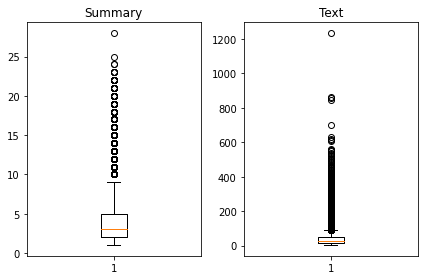

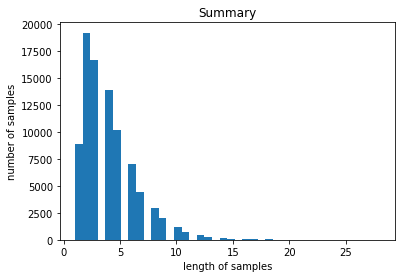

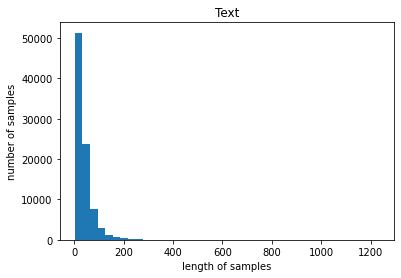

In [17]:
# 길이 분포 출력
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['Text']]
summary_len = [len(s.split()) for s in data['Summary']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(summary_len)))
print('요약의 최대 길이 : {}'.format(np.max(summary_len)))
print('요약의 평균 길이 : {}'.format(np.mean(summary_len)))

plt.subplot(1,2,1)
plt.boxplot(summary_len)
plt.title('Summary')
plt.subplot(1,2,2)
plt.boxplot(text_len)
plt.title('Text')
plt.tight_layout()
plt.show()

plt.title('Summary')
plt.hist(summary_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

- 위의 그래프처럼, 많은 양의 데이터를 다룰 때는 데이터를 시각화하여 보는 것이 도움이 됨
- 위에서부터 차례대로 그래프는 각각 요약과 실제 텍스트의 길이 분포, 요약본 샘플 길이별 개수, 실제 텍스트 샘플 길이별 개수를 나타내고 있음
- Text의 경우 최소 길이가 2, 최대 길이가 1,235로 그 차이가 굉장히 큼
- 하지만 평균 길이는 38로 시각화된 그래프로 봤을 때, 대체적으로는 100 내외의 길이를 가진다는 것을 확인할 수 있음
- Summary의 경우 최소 길이가 1, 최대 길이가 28, 그리고 평균 길이가 4로 Text에 비해 상대적으로 길이가 매우 짧음
- 그래프로 봤을 때에도 대체적으로 10이하의 길이를 가지고 있음
- 이로부터 Text의 최대 길이와 Summary의 적절한 최대 길이를 임의로 정해보기

In [18]:
text_max_len = 50
summary_max_len = 8

- 각각 50과 8로 정했는데, 이 길이를 선택했을 때, 얼마나 많은 샘플들을 자르지 않고 포함할 수 있는지 통계로 확인하는 편이 객관적으로 길이를 결정하는데 도움이 될것
- 훈련 데이터와 샘플의 길이를 입력하면, 데이터의 몇 %가 해당하는지 계산하는 함수 만들어서 좀 더 정확하게 판단

In [19]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s.split()) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

- 이렇게 만든 함수를 Text와 Summary에 적용해 우리가 결정한 임의의 길이가 몇 %의 샘플까지 포함하는지 볼 수 있음

In [20]:
below_threshold_len(text_max_len, data['Text'])
below_threshold_len(summary_max_len,  data['Summary'])

전체 샘플 중 길이가 50 이하인 샘플의 비율: 0.7745119121724859
전체 샘플 중 길이가 8 이하인 샘플의 비율: 0.9424593967517402


- 각각 50과 8로 패딩을 하게 되면 해당 길이보다 긴 샘플들은 내용이 잘리게 되는데, Text 열의 경우에는 약 23%의 샘플들이 내용이 망가지게 된다고 함
- 정해진 길이에 맞춰 자르는 것이 아니라, 정해진 길이보다 길면 제외하는 방법으로 데이터 정제

In [21]:
data = data[data['Text'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['Summary'].apply(lambda x: len(x.split()) <= summary_max_len)]
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 65818


#### 시작 토큰과 종류 토큰 추가하기

- 디코더는 시작 토큰을 입력받아 문장을 생성하기 시작하고, 종료 토큰을 예측한 순간에 문장 생성을 멈춤
- [시작 토큰 SOS와 종료 토큰 EOS는 각각 start of a sequence와 end of a sequence를 나타냄](about:blank)
![image4.png](./images/image4.png)
- seq2seq 훈련을 위해서는 디코더의 입력과 레이블에 시작 토큰과 종료 토큰을 추가할 필요가 있음
- 이번 실습에서는 시작 토큰은 'sostoken', 종료 토큰은 'eostoken'이라 임의로 명명하고 앞, 뒤로 추가할 것
- 디코더의 입력에 해당하면서 시작 토큰이 맨 앞에 있는 문장의 이름을 'decoder_input'
- 디코더의 출력 또는 레이블에 해당되면서 종료 토콘이 맨 뒤에 붙는 문장의 이름을 'decoder_target'이라고 이름을 정함
- 2개의 문장 모두 Summary 열로부터 만들 것

In [22]:
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가
data['decoder_input'] = data['Summary'].apply(lambda x: 'sostoken ' + x)
data['decoder_target'] = data['Summary'].apply(lambda x: x + ' eostoken')
data.head()

,Text,Summary,decoder_input,decoder_target
0,bought several vitality canned dog food produc...,good quality dog food,sostokengood quality dog food,good quality dog foodeostoken
1,product arrived labeled jumbo salted peanuts p...,not as advertised,sostokennot as advertised,not as advertisedeostoken
2,confection around centuries light pillowy citr...,delight says it all,sostokendelight says it all,delight says it alleostoken
3,looking secret ingredient robitussin believe f...,cough medicine,sostokencough medicine,cough medicineeostoken
4,great taffy great price wide assortment yummy ...,great taffy,sostokengreat taffy,great taffyeostoken


- 앞뒤로 토큰이 잘 붙었음
- 인코더의 입력, 디코더의 입력과 레이블을 각각 다시 Numpy 타입으로 저장

In [23]:
# 인코더의 입력
encoder_input = np.array(data['Text'])

# 디코더의 입력
decoder_input = np.array(data['decoder_input'])

# 디코더의 레이블
decoder_target = np.array(data['decoder_target'])

- 이제 훈련 데이터와 테스트 데이터를 분리
- 훈련 데이터와 테스트 데이터를 분리하는 방법은 분리 패키지를 사용하는 방법, 또는 직접 코딩을 통해서 분리하는 방법 등 여러 가지가 있음
- 직접 분리하는 방식 사용해 우선 'encoder_input'과 크기와 형태가 같은 순서가 섞인 정수 시퀀스 만들어주기

In [24]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[19326  5496 27076 ... 31745 62926 65698]


- 이 정수 시퀀스를 이용해 다시 데이터의 샘플 순서를 정의해 주면 잘 섞인 샘플이 됨

In [25]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

- 섞인 데이터를 8:2의 비율로 훈련 데이터와 테스트 데이터로 분리
- 전체 데이터의 크기에서 0.2를 곱해서 테스트 데이터의 크기 정의

In [26]:
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :', n_of_val)

테스트 데이터의 수 : 13163


- 이렇게 정의한 테스트 데이터의 개수를 이용해 전체 데이터를 양분
- :표시의 위치에 주의

In [27]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = encoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수:', len(encoder_input_train))
print('훈련 레이블의 개수:', len(decoder_input_train))
print('테스트 데이터의 개수:', len(encoder_input_test))
print('테스트 레이블의 개수: ', len(decoder_input_test))

훈련 데이터의 개수: 52655
훈련 레이블의 개수: 52655
테스트 데이터의 개수: 13163
테스트 레이블의 개수:  13163


- 훈련 데이터와 테스트 데이터가 각각 52,655개와 13,163개로 잘 분리된 것을 볼 수 있음

## 7. 데이터 전처리하기 (3) 정수 인코딩

### **단어 집합(vocabulary) 만들기 및 정수 인코딩**
- 이제 기계가 텍스트를 숫자로 처리할 수 있도록 훈련 데이터와 테스트 데이터의 단어들을 모두 정수로 바꾸어 주어야 함
- 이를 위해서는 각 단어에 고유한 정수를 맵핑하는 작업이 필요
- 이 가정을 **단어 집합(vocabulary)** 을 만든다고 표현
- 훈련 데이터에 대해서 단어 집합 만들어보기
- 우선, 원문에 해당되는 'encoder_input_train'에 대해서 단어 집합 만들기
- Keras의 토크나이저를 사용하면, 입력된 훈련 데이터로부터 단어 집합 만들 수 있음

In [28]:
# 토크나이저 정의
src_tokenizer = Tokenizer()

# 입력된 데이터로부터 단어 집합 생성
src_tokenizer.fit_on_texts(encoder_input_train)

- 단어 집합이 생성되는 동시에 각 단어에 고유한 정수가 부여되었음
- 현재 생성된 단어 집합은 'src_tokenizer.word_index'에 저장되어 있음
- 그런데 이렇게 만든 단어 집합에 있는 모든 단어를 사용하는 것이 아니라, 빈도수가 낮은 단어들은 훈련 데이터에서 제외하고 진행하려고 함
- 등장 빈도수가 7회 미만인 단어들이 이 데이터에서 얼만큼의 비중을 차지하는지 확인해보기
- 'src_tokenizer.word_counts.items()에는 단어와 각 단어의 등장 빈도수가 저장돼 있는데, 이를 통해서 통계적인 정보를 얻을 수 있음

In [29]:
threshold = 7

# 단어의 수
total_cnt = len(src_tokenizer.word_index)
# 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
rare_cnt = 0
# 훈련 데이터의 전체 단어 빈도수 총합
total_freq = 0
# 등장 빈도수가 thrdshold보다 작은 단어의 등장 빈도수의 총합
rare_freq = 0

# 단어와 빈도수의 쌍(pair)을 key와 value로 받음
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value
    
    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_Freq = rare_freq + value
        
print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)        

단어 집합(vocabulary)의 크기 : 32154
등장 빈도가 6번 이하인 희귀 단어의 수: 23900
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 8254
단어 집합에서 희귀 단어의 비율: 74.32978789575169
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.0


- 'encoder_input_train'에는 3만여 개의 단어가 있음
- 그 아래의 통계 정보들을 해석
- 등장 빈도가 threshold 값인 7회 미만, 즉 6회 이하인 단어들은 단어 집합에서 무려 70% 이상을 차지
- 하지만, 실제로 훈련 데이터에서 등장 빈도로 차지하는 비중은 0% 밖에 되지 않음
- 그래서 등장 빈도가 6회 이하인 단어들은 정수 인코딩 과정에서 빼고, 훈련 데이터에서 제거하고자 함
- 위에서 이를 제외한 단어 집합의 크기를 8천여 개로 계산했는데, 이와 비슷한 값으로 어림잡아 단어 집합의 크기를 8,000으로 제한
- 토크나이저를 정의할 때 num_words의 값을 정해주면, 단어 집합의 크기를 제한할 수 있음

In [30]:
src_vocab = 8000
# 단어 집합의 크기를 8,000으로 제한
src_tokenizer = Tokenizer(num_words = src_vocab)
# 단어 집합 재생성
src_tokenizer.fit_on_texts(encoder_input_train)

- 'texts_to_sequences()'는 생성된 단어 집합에 기반하여 입력으로 주어진 텍스트 데이터의 단어들을 모두 정수로 변환하는 정수 인코딩을 수행
- 현재 단어 집합의 크기를 8,000으로 제한했으니 이제 8,000이 넘는 숫자들은 정수 인코딩 후에는 데이터에 존재하지 않음

In [31]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train)
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# 잘 진행되었는지 샘플 출력
print(encoder_input_train[:3])

[[6, 11, 419, 665, 4, 52, 223, 626, 665, 79, 3, 1015, 1806, 92, 107, 43, 963, 6, 115, 22, 183, 6159, 11, 144, 5445, 6159, 269, 3978, 159, 1577], [126, 525, 154, 82, 174, 29, 37, 363, 5, 435, 29, 1514, 48, 330, 157, 166, 114, 149, 197, 663, 20, 525, 5, 26, 34, 7182, 29, 956, 1057, 2391, 1742, 166, 1315, 379, 7182, 4173], [3, 5, 250, 420, 282, 1530, 45, 141, 125, 79, 68, 7, 268, 298, 2249, 84, 3543, 18, 1709, 22, 324, 784, 9, 784, 40, 1893, 784, 999, 285, 115, 293, 40, 272]]


- 이제 더 이상 텍스트 데이터가 아니라 정수가 나오고 있음
- Summary 데이터에 대해서도 동일한 작업을 수행
- 케라스의 토크나이저를 사용하여 'decoder_input_train'을 입력으로 전체 단어 집합과 각 단어에 대한 빈도수 계산

In [32]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

- 단어 집합이 생성되는 동시에 각 단어에 고유한 정수가 부여되었음
- 이는 'tar_tokenizer.word_index'에 저장되어 있음
- 'tar_tokenizer.word_counts.items()'에는 단어와 각 단어의 등장 빈도수가 저장돼 있음
- 이를 통해서 통계적인 정보를 얻어서, 등장 빈도수가 6회 미만인 단어들이 이 데이터에 얼만큼의 비중을 차지하는지 확인

In [33]:
threshold = 6
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 32154
등장 빈도가 5번 이하인 희귀 단어의 수: 23166
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 8988
단어 집합에서 희귀 단어의 비율: 72.04702369845121
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.05080400619047


- 등장 빈도가 5회 이하인 단어들은 단어 집합에서 약 77%를 차지
- 하지만, 실제로 훈련 데이터에서 등장 빈도로 차지하는 비중은 상대적으로 매우 적은 수치인 5.89%밖에 되지 않음
- 이전에 했던 것과 동일하게 이 단어들은 모두 제거
- 어림잡아 2,000을 단어 집합의 크기로 제한

In [35]:
tar_vocab = 8000
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

AttributeError: 'int' object has no attribute 'lower'

- 정상적으로 정수 인코딩 작업이 끝났음
- 현재 'decoder_input_train'과 'decoder_target_train'에는 더 이상 숫자 2,000이 넘는 숫자들은 존재'하지 않음
- 그런데 다음 작업인 패딩하기로 넘어가기 전에 한가지 점검해야 할 것이 있음
- 전처 데이터에서 빈도수가 낮은 단어가 삭제되었다는 것은 빈도수가 낮은 단어만으로 구성되었던 샘플들은 이제 빈(empty) 샘플이 되었을 가능성이 있음
- 이 현상은 상대적으로 길었던 원문(Text)의 경우에는 문제가 별로 없겠지만, 애초에 평균 길이가 4밖에 되지 않았던 요약문(Summary)의 경우에는 이 현상이 굉장히 두드러졌을 가능송이 높음
- 요약문에서 길이가 0이 된 샘플들의 인덱스 받아오기
- 주의할 점은 요약문인 'decoder",input', 'sostoken'

In [36]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = np.delete(encoder_input_train, drop_train, axis=0)
decoder_input_train = np.delete(decoder_input_train, drop_train, axis=0)
decoder_target_train = np.delete(decoder_target_train, drop_train, axis=0)

encoder_input_test = np.delete(encoder_input_test, drop_test, axis=0)
decoder_input_test = np.delete(decoder_input_test, drop_test, axis=0)
decoder_target_test = np.delete(decoder_target_test, drop_test, axis=0)

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 7
삭제할 테스트 데이터의 개수 : 3618
훈련 데이터의 개수 : 52648
훈련 레이블의 개수 : 52648
테스트 데이터의 개수 : 9545
테스트 레이블의 개수 : 9545


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


### 패딩하기
- 텍스트 시퀀스를 

In [37]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=summary_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=summary_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=summary_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=summary_max_len, padding='post')

## 8. 모델 설계하기

In [38]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

In [39]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

In [40]:
# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 128)      1024000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 50, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

### 어텐션 메커니즘

In [41]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/thushv89/attention_keras/master/src/layers/attention.py", filename="attention.py")
from attention import AttentionLayer

In [42]:
# 어텐션 층(어텐션 함수)
attn_layer = AttentionLayer(name='attention_layer')
# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 128)      1024000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 50, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

## 9. 모델 훈련하기

In [43]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=256, callbacks=[es], epochs=50)

Epoch 1/50


KeyboardInterrupt: 

In [45]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

NameError: name 'history' is not defined

## 10. 인피런스 모델 구현하기

In [46]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

In [47]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

In [48]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [49]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (summary_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence

## 11. 모델 테스트하기

In [50]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if ((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp

In [51]:
for i in range(50, 100):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 : tried variety vegetarian vegan dog foods years senior dog well likes natural balance vegetarian formula canned dog food glad years old along supplements help aging issues dog food gentle stomach wheat soy free although organic 


KeyError: 'sostoken'

## 12. 추출적 요약 해보기

### 패키지 설치

- 클라우드의 경우 이미 'summa'가 설치돼있음
```python
$ pip list | grep summa
```

### 데이터 다운로드하기

In [52]:
import requests
from summa.summarizer import summarize

In [53]:
# 메트릭스 시놉시스 다운로드
text = requests.get('http://rare-technologies.com/the_matrix_synopsis.txt').text

In [54]:
print(text[:1500])

The screen is filled with green, cascading code which gives way to the title, The Matrix.

A phone rings and text appears on the screen: "Call trans opt: received. 2-19-98 13:24:18 REC: Log>" As a conversation takes place between Trinity (Carrie-Anne Moss) and Cypher (Joe Pantoliano), two free humans, a table of random green numbers are being scanned and individual numbers selected, creating a series of digits not unlike an ordinary phone number, as if a code is being deciphered or a call is being traced.

Trinity discusses some unknown person. Cypher taunts Trinity, suggesting she enjoys watching him. Trinity counters that "Morpheus (Laurence Fishburne) says he may be 'the One'," just as the sound of a number being selected alerts Trinity that someone may be tracing their call. She ends the call.

Armed policemen move down a darkened, decrepit hallway in the Heart O' the City Hotel, their flashlight beam bouncing just ahead of them. They come to room 303, kick down the door and find a

### summarize 사용하기

- Summa의 summarize()의 인자로 사용되는 값들에 대해서 알아보기
>text(str): 요약할 테스트<br>
>ratio(float, optiona): 요약문에서 원본에서 선택되는 문장 비율. 0 ~ 1 사이값<br>
>words(int or None, optional): 출력에 포함할 단어 수<br>
만약, ratio와 함께 두 파라미터가 모두 제공되는 경우, ratio는 무시<br>
>split(bool, optional): True면 문장 list/False는 조인(join)된 문자열을 반환

- Summa의 summarize는 문장 토큰화롤 별도로 하지 않더라도 내부적으로 문장 토큰화를 수행
- 그렇기 때문에 문장 구분이 되어있지 않은 원문을 바로 입력으로 넣을 수 있음
- 비율을 적게 주어서 요약문으로 선택되는 문장의 개수 줄여보기
- 원문의 0.005%만을 출력하도록 설정

In [55]:
print('Summary:')
print(summarize(text, ratio=0.005))

Summary:
Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.
Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.


- 리스트로 출력 결과를 받고 싶다면, split 인자의 값을 True로 하면 됨

In [56]:
print('Summary:')
print(summarize(text, ratio=0.005, split=True))

Summary:
['Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.', 'Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.']


In [57]:
print('Summary:')
print(summarize(text, words=50))

Summary:
Trinity takes Neo to Morpheus.
Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.
Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.
